In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MaxNLocator

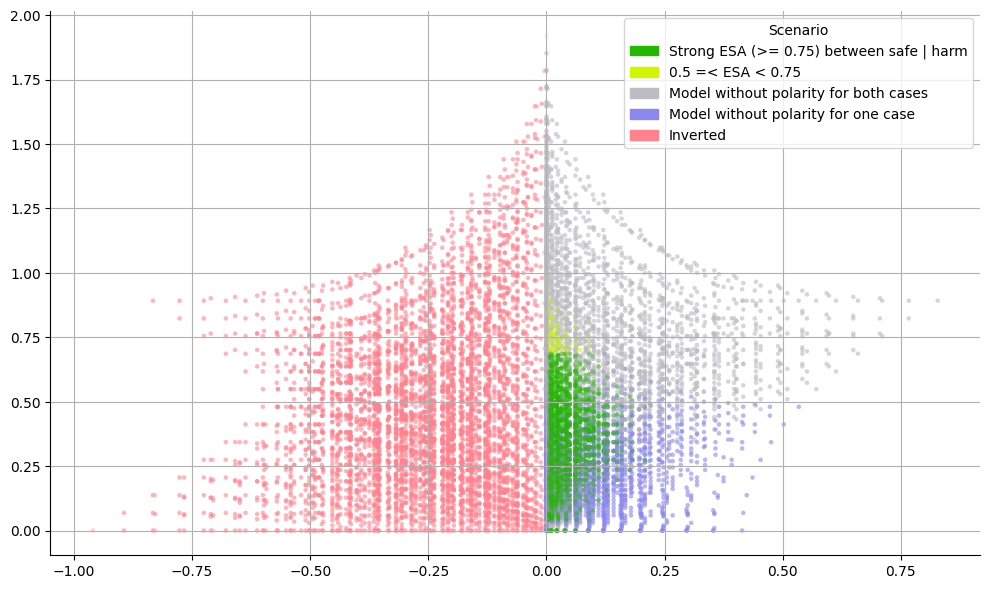

In [175]:
import matplotlib.patches as mpatches
step = 0.07
values = np.arange(0, 1.01, step)
pc_list, ci_list = [], []
categories = []

combinations = list(product(values, repeat=4))

# Categorization thresholds
def categorize(pc, ci, artifact=False):

    if pc < 0:
        return 'Inverted'
    if artifact == 1:
        return 'Model without polarity for both cases'
    if artifact == 2:
        return 'Model without polarity for one case'
    
    if (pc < 0.23) and (ci <= 0.69) and (pc > 0):
        return 'Strong ESA (>= 0.75) between safe | harm'
    if (0.69 < ci <= 0.875) and (pc <= 0.81):
        return '0.5 =< ESA < 0.75' #'Separation accuracy 0.625 <= acc < 0.75'
    if (0.81 < pc <= 0.99) or (ci > 0.875):
        return '0.5 =< ESA < 0.75' #'Separation accuracy 0.5 <= acc < 0.625'
    else:
        return 'Model without polarity for one case'


for pxp, pxn, pbp, pbn in combinations:
    delta1 = pxp - pbp
    delta2 = pbn - pxn
    sign_product = np.sign(delta1) * np.sign(delta2)
    
    pc = 0.5 * ((pxp - pbn)**2 + (pxn - pbp)**2) * sign_product
    ci = pxp * pbp + pxn * pbn

    # Artifact key logic
    if (pxp <= 0.5) and (pxn <= 0.5) and (pbp <= 0.5) and (pbn <= 0.5):
        artifact_key = 1
    elif (pxp <= 0.5 and pxn <= 0.5) or (pbp <= 0.5 and pbn <= 0.5):
        artifact_key = 2
    elif ((pxp > 0.5) and (pbp > 0.5)) or ((pxn > 0.5) and (pbn > 0.5)):
        artifact_key = 1
    else:
        artifact_key = None

    pc_list.append(pc)
    ci_list.append(ci)
    categories.append(categorize(pc, ci, artifact=artifact_key))


# Plotting
# colors = {'Strong ESA (>= 0.75) between safe | harm': 'springgreen', 
#          '0.5 =< ESA < 0.75': 'aquamarine', 
#           'Model without polarity for both cases': 'steelblue',
#           'Model without polarity for one case' : 'lightskyblue',
#           'Inverted': 'salmon'
#           }

colors = {
    'Strong ESA (>= 0.75) between safe | harm': "#25B800",  # новый яркий зелёно-бирюзовый
    '0.5 =< ESA < 0.75': "#CFF800",                         # фиолетово-синий
    'Model without polarity for both cases': "#BCBCC2",    
    'Model without polarity for one case': "#8B87EE",       
    'Inverted': '#FF828E',
}






color_vals = [colors[cat] for cat in categories]

plt.figure(figsize=(10, 6))

plt.scatter(pc_list, ci_list, c=color_vals, s=10, alpha=0.2, edgecolor='none')

# Legend
patches = [mpatches.Patch(color=val, label=key) for key, val in colors.items()]
plt.legend(handles=patches, title='Scenario')

# plt.xlabel('Polar Consistency (PC)')
# plt.ylabel('Contradiction Index (CI)')
#plt.title("Compromise between PC and CI in all theoretical probability combinations (step = 0.05) with empirical ranges")
plt.grid(True)
plt.tight_layout()
plt.show()


In [138]:
artifact_list = []
for pxp, pxn, pbp, pbn in combinations: #x^+, x^-, not(x^+), not(x^-)
    # Polar Consistency
    delta1 = pxp - pbp
    delta2 = pbn - pxn
    sign_product = np.sign(delta1) * np.sign(delta2)
    
    artifact_key=None

    pc = 0.5 * ((pxp - pbn)**2 + (pxn - pbp)**2) * sign_product
    ci = pxp * pbp + pxn * pbn


    if (pxp <= 0.5) and (pxn <= 0.5) and (pbp <= 0.5) and (pbn <= 0.5):
        artifact_key = 1
        
    if (pxp <= 0.5 and pxn <= 0.5) or (pbp <= 0.5 and pbn <= 0.5):
        artifact_key = 2
        
    if ((pxp > 0.5) and (pbp > 0.5)) or ((pxn > 0.5) and (pbn > 0.5)) :
        artifact_key = 1


    pc_list.append(pc)
    ci_list.append(ci)

    if artifact_key != None:
        categories.append(categorize(pc, ci, artifact=artifact_key))
    else:
        categories.append(categorize(pc, ci, artifact=artifact_key))


    if categorize(pc, ci, artifact=artifact_key) == 'Model without polarity for one case':
        artifact_list.append([pxp, pxn, pbp, pbn, pc, ci])

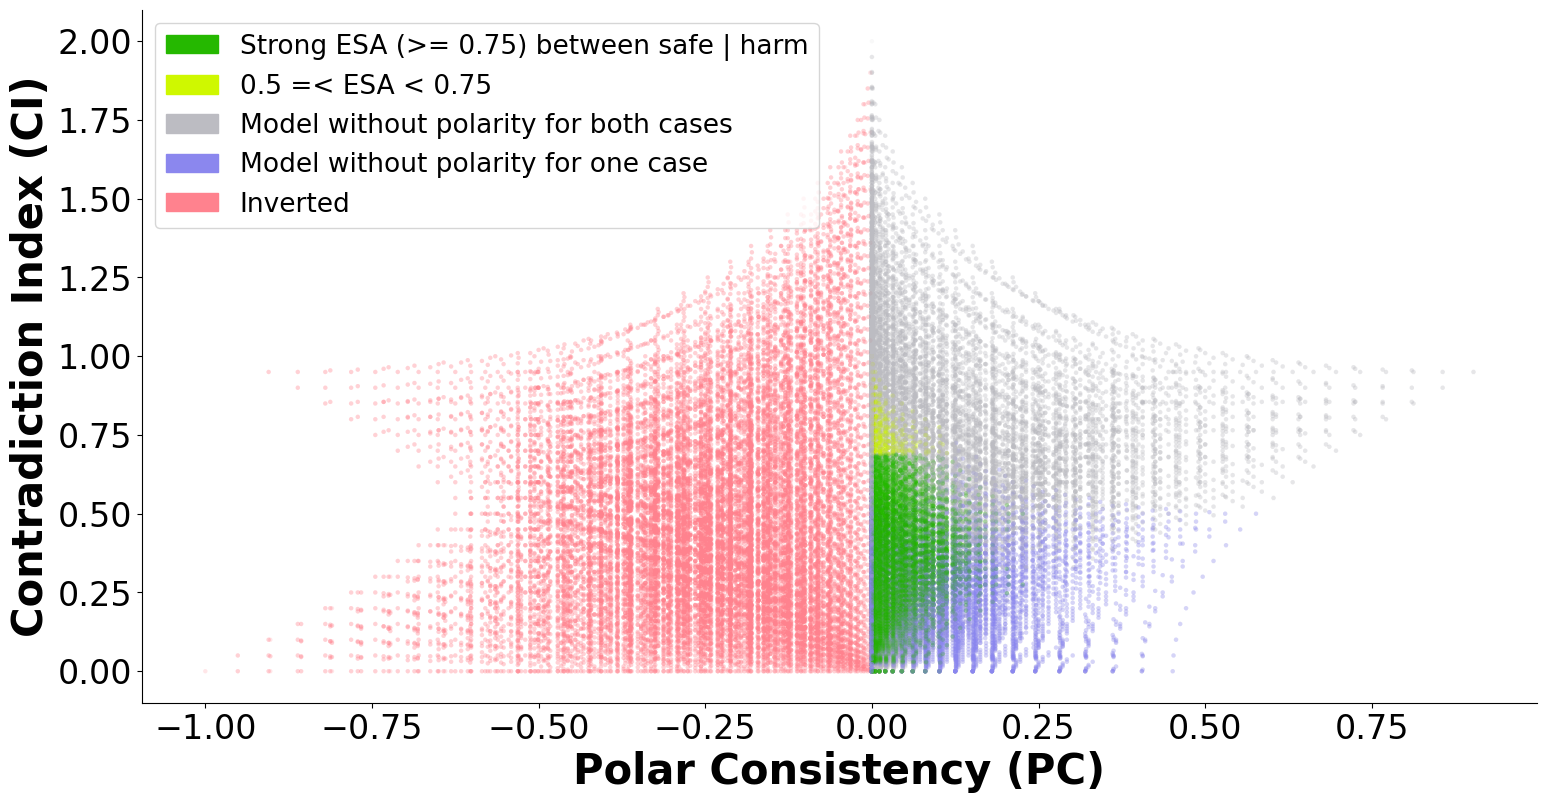

In [176]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from itertools import product
import numpy as np

import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

step = 0.05
values = np.arange(0, 1.01, step)
pc_list, ci_list = [], []
categories = []

combinations = list(product(values, repeat=4))

# Categorization thresholds
# Categorization thresholds
def categorize(pc, ci, artifact=False):

    if pc < 0:
        return 'Inverted'
    if artifact == 1:
        return 'Model without polarity for both cases'
    if artifact == 2:
        return 'Model without polarity for one case'
    
    if (pc < 0.23) and (ci <= 0.69) and (pc > 0):
        return 'Strong ESA (>= 0.75) between safe | harm'
    if (0.69 < ci <= 0.875) and (pc <= 0.81):
        return '0.5 =< ESA < 0.75' #'Separation accuracy 0.625 <= acc < 0.75'
    if (0.81 < pc <= 0.99) or (ci > 0.875):
        return '0.5 =< ESA < 0.75' #'Separation accuracy 0.5 <= acc < 0.625'
    else:
        return 'Model without polarity for one case'


for pxp, pxn, pbp, pbn in combinations:
    delta1 = pxp - pbp
    delta2 = pbn - pxn
    sign_product = np.sign(delta1) * np.sign(delta2)
    
    pc = 0.5 * ((pxp - pbn)**2 + (pxn - pbp)**2) * sign_product
    ci = pxp * pbp + pxn * pbn

    # Artifact key logic
    if (pxp <= 0.5) and (pxn <= 0.5) and (pbp <= 0.5) and (pbn <= 0.5):
        artifact_key = 1
    elif (pxp <= 0.5 and pxn <= 0.5) or (pbp <= 0.5 and pbn <= 0.5):
        artifact_key = 2
    elif ((pxp > 0.5) and (pbp > 0.5)) or ((pxn > 0.5) and (pbn > 0.5)):
        artifact_key = 1
    else:
        artifact_key = None

    pc_list.append(pc)
    ci_list.append(ci)
    categories.append(categorize(pc, ci, artifact=artifact_key))

# Plotting
# colors  = ["#FF9999", "#FFB3B3", "#C2D6FF", "#99B3FF", "#BFFFBF", "#99FF99",
#           "#CCB3FF", "#FFE0B3", "#FFCC99", "#FFFFB3", "#D9D9D9", "#E6CCB3",
#           "#FFB3E6", "#FF99CC", "#B3B3B3", "#D9D9D9"]
colors = {
    'Strong ESA (>= 0.75) between safe | harm': "#25B800",  # новый яркий зелёно-бирюзовый
    '0.5 =< ESA < 0.75': "#CFF800",                         # фиолетово-синий
    'Model without polarity for both cases': "#BCBCC2",    
    'Model without polarity for one case': "#8B87EE",       
    'Inverted': '#FF828E',
}

color_vals = [colors[cat] for cat in categories]
fontsize=30
plt.figure(figsize=(18, 9))
plt.scatter(pc_list, ci_list, c=color_vals, s=10, alpha=0.1, edgecolor='none')

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Legend
patches = [mpatches.Patch(color=val, label=key) for key, val in colors.items()]
plt.legend(handles=patches, fontsize=19)

plt.xlabel('Polar Consistency (PC)', fontsize=fontsize, weight="bold")
plt.ylabel('Contradiction Index (CI)', fontsize=fontsize, weight="bold")
# plt.title("Compromise between PC and CI in all theoretical probability combinations (step = 0.05) with empirical ranges")
plt.savefig("teaser.pdf", dpi=300, bbox_inches="tight")#, facecolor="white")

In [151]:
artifact_list[700]

[np.float64(0.0),
 np.float64(0.6300000000000001),
 np.float64(0.07),
 np.float64(0.21000000000000002),
 np.float64(0.17885000000000004),
 np.float64(0.13230000000000003)]

In [ ]:
colors = {'Strong ESA (>= 0.75) between safe | harm': 'springgreen', 
         '0.5 =< ESA < 0.75': 'aquamarine', 
          'Model without polarity for both cases': 'steelblue',
          'Model without polarity for one case' : 'lightskyblue',
          'Inverted': 'salmon'
          }